**Stock Price Predictions using LSTM**

Installing Libraries

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.4 MB 7.4 MB/s 
     |████████████████████████████████| 63 kB 2.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math
from sklearn.preprocessing import MinMaxScaler
import datetime as dt
import pandas_datareader as web
import yfinance as yf

Uploading Symbol Names

In [ ]:
from google.colab import files
uploaded = files.upload()
compamy_name_symbol = pd.read_excel("Companies with thier Symbol.xlsx","Data")

Saving Companies with thier Symbol.xlsx to Companies with thier Symbol.xlsx


Data Fetching

In [ ]:
#Load Data
compamy_name_symbol.dropna()
start = dt.datetime(2016,1,1)
end = dt.datetime.now()
#companies = ['ADANIPORTS.NS','INFY.NS','SAIL.NS']
total_dataset = pd.DataFrame(columns = ['High','Low','Open','Close','Volume','Adj Close','Date','Sector','Company Name','Industry','Symbol','Security Name']) 
#total_dataset.set_index('Date')

for company in compamy_name_symbol['Symbol']:
    #print(compamy_name_symbol[compamy_name_symbol['Symbol'] == company])
    try:
        tick = yf.Ticker(company+'.NS')
        data = tick.history(period="5y")
        #data = web.DataReader(company+'.NS', start, end)
        data['Date'] = data.index
        data.reset_index(drop=True, inplace=True)
        #dataset = compamy_name_symbol[compamy_name_symbol['Symbol'] == company] + data
        data[compamy_name_symbol[compamy_name_symbol['Symbol'] == company].columns] =compamy_name_symbol[compamy_name_symbol['Symbol'] == company].values[0]
        total_dataset=total_dataset.append(data)
        #print(data)
        #print(total_dataset)
    except:
        pass
#total_dataset

- IBULLS.NS: No data found, symbol may be delisted
- RELHOME.NS: No data found for this date range, symbol may be delisted
- MUTHTFN.NS: No data found, symbol may be delisted
- DEEPAKNI.NS: No data found for this date range, symbol may be delisted
- KSBPUMPS.NS: No data found for this date range, symbol may be delisted
- 3IINFOTECH.NS: No data found, symbol may be delisted
- EASTRNSI.NS: No data found, symbol may be delisted
- SHIVTEX.NS: No data found for this date range, symbol may be delisted
- ZENCAP.NS: No data found, symbol may be delisted
- JINDALIRON.NS: No data found, symbol may be delisted
- TATASTLBSL.NS: No data found, symbol may be delisted
- AVANTI.NS: No data found for this date range, symbol may be delisted
- TATATELELR.NS: No data found, symbol may be delisted


In [ ]:
data=total_dataset
data

,High,Low,Open,Close,Volume,Adj Close,Date,Sector,Company Name,Industry,Symbol,Security Name,Dividends,Stock Splits
0,13.386231,12.865655,13.148253,12.999517,30852,NaN,2017-05-29,Automotive,PTL Enterprises,Tyres,PTL,PTL ENTERPRISES LTD.-$,0.0,0.0
1,13.341609,12.999517,12.999517,13.103632,15876,NaN,2017-05-30,Automotive,PTL Enterprises,Tyres,PTL,PTL ENTERPRISES LTD.-$,0.0,0.0
2,13.534966,13.088759,13.475472,13.252368,44048,NaN,2017-05-31,Automotive,PTL Enterprises,Tyres,PTL,PTL ENTERPRISES LTD.-$,0.0,0.0
3,13.639082,12.791288,13.639082,13.430853,46228,NaN,2017-06-01,Automotive,PTL Enterprises,Tyres,PTL,PTL ENTERPRISES LTD.-$,0.0,0.0
4,13.594461,12.821034,12.821034,13.386230,83282,NaN,2017-06-02,Automotive,PTL Enterprises,Tyres,PTL,PTL ENTERPRISES LTD.-$,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1231,235.899994,228.750000,234.949997,229.800003,16642801,NaN,2022-05-23,Utilities,Tata Power,Power - Generation & Distribution,TATAPOWER,TATA POWER CO.LTD.,0.0,0.0
1232,231.399994,224.750000,230.199997,227.000000,17636195,NaN,2022-05-24,Utilities,Tata Power,Power - Generation & Distribution,TATAPOWER,TATA POWER CO.LTD.,0.0,0.0
1233,229.899994,220.000000,229.000000,220.899994,16194564,NaN,2022-05-25,Utilities,Tata Power,Power - Generation & Distribution,TATAPOWER,TATA POWER CO.LTD.,0.0,0.0
1234,224.300003,210.199997,222.949997,221.449997,34963419,NaN,2022-05-26,Utilities,Tata Power,Power - Generation & Distribution,TATAPOWER,TATA POWER CO.LTD.,0.0,0.0


All Symbols

In [ ]:
all_stock_tick_names = data['Symbol'].unique()
print(all_stock_tick_names)

['PTL' 'ASHOKLEY' 'TATAMOTORS' 'HINDMOTORS' 'HEROMOTOCO' 'BOSCHLTD' 'M&M'
 'MRF' 'EXIDEIND' 'JKTYRE' 'TVSSRICHAK' 'APOLLOTYRE' 'ESCORTS' 'MARUTI'
 'TVSMOTOR' 'BAJAJ-AUTO' 'FORCEMOT' 'AUTOAXLES' 'CEATLTD' 'RELIGARE'
 'PNBHOUSING' 'LICHSGFIN' 'EDELWEISS' 'L&TFH' 'DELTACORP' 'CENTRALBK'
 'BAJAJFINSV' 'BANKINDIA' 'KTKBANK' 'YESBANK' 'BAJFINANCE' 'IDBI'
 'SUNDARMFIN' 'BANKBARODA' 'INDUSINDBK' 'UNIONBANK' 'CHOLAFIN' 'IIFL'
 'MUTHOOTFIN' 'DCBBANK' 'FEDERALBNK' 'KOTAKBANK' 'KARURVYSYA' 'MOTILALOFS'
 'PNB' 'AXISBANK' 'CANBK' 'MANAPPURAM' 'IITL' 'HDFCBANK' 'ICICIBANK'
 'SBIN' 'VIVIDHA' 'TANTIACONS' 'UNITECH' 'ORIENTCEM' 'ULTRACEMCO'
 'RAMCOCEM' 'INDIACEM' 'AMBUJACEM' 'ACC' 'JKLAKSHMI' 'EVERESTIND'
 'PIDILITIND' 'ASIANPAINT' 'BERGEPAINT' 'SINTEX' 'NESCO' 'SBILIFE'
 'VOLTAS' 'BOMDYEING' 'ICICIGI' 'BUTTERFLY' 'SYMPHONY' 'WHIRLPOOL'
 'BAJAJELEC' 'IFBIND' 'EVEREADY' 'GILLETTE' 'DABUR' 'RELAXO' 'BPL'
 'POWERMECH' 'KIRLOSBROS' 'BEML' 'KALPATPOWR' 'LT' 'HPL' 'ADANIPORTS'
 'CUMMINSIND' 'THERMAX' 'SIEMENS

Input Symbol Name

In [ ]:
# 1. Getting a stock name
stock_name = input("Enter a Stock Price Symbol: ")
 
# 2. Extrating all the data having the name same as the stock name entered
all_data = data['Symbol'] == stock_name
 
# 3. Putting all the rows of specific stock in a variable
final_data = data[all_data]
 
# 4. Printing first 5 rows of the stock data of a specific stock name
final_data

Enter a Stock Price Symbol: PNB


,High,Low,Open,Close,Volume,Adj Close,Date,Sector,Company Name,Industry,Symbol,Security Name,Dividends,Stock Splits
0,151.850006,143.050003,150.449997,145.100006,8154328,NaN,2017-05-29,Banking/Finance,PNB,Banks - Public Sector,PNB,PUNJAB NATIONAL BANK,0.0,0.0
1,148.000000,142.399994,143.899994,146.350006,10767305,NaN,2017-05-30,Banking/Finance,PNB,Banks - Public Sector,PNB,PUNJAB NATIONAL BANK,0.0,0.0
2,151.600006,145.000000,146.850006,150.500000,16851657,NaN,2017-05-31,Banking/Finance,PNB,Banks - Public Sector,PNB,PUNJAB NATIONAL BANK,0.0,0.0
3,152.300003,149.250000,151.000000,151.899994,9103808,NaN,2017-06-01,Banking/Finance,PNB,Banks - Public Sector,PNB,PUNJAB NATIONAL BANK,0.0,0.0
4,154.050003,150.899994,153.399994,153.050003,7997880,NaN,2017-06-02,Banking/Finance,PNB,Banks - Public Sector,PNB,PUNJAB NATIONAL BANK,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1231,30.850000,29.900000,30.100000,30.600000,42055819,NaN,2022-05-23,Banking/Finance,PNB,Banks - Public Sector,PNB,PUNJAB NATIONAL BANK,0.0,0.0
1232,30.950001,30.150000,30.500000,30.299999,56809933,NaN,2022-05-24,Banking/Finance,PNB,Banks - Public Sector,PNB,PUNJAB NATIONAL BANK,0.0,0.0
1233,30.799999,29.750000,30.350000,29.799999,40570359,NaN,2022-05-25,Banking/Finance,PNB,Banks - Public Sector,PNB,PUNJAB NATIONAL BANK,0.0,0.0
1234,30.450001,28.900000,30.000000,30.250000,43717993,NaN,2022-05-26,Banking/Finance,PNB,Banks - Public Sector,PNB,PUNJAB NATIONAL BANK,0.0,0.0


Comparing 5 years vs 3 months data

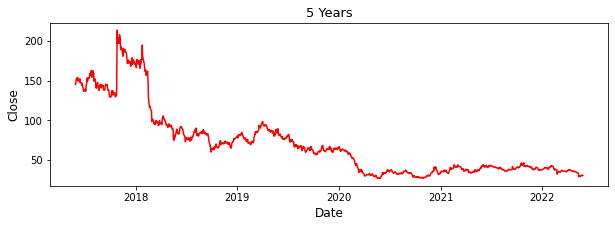

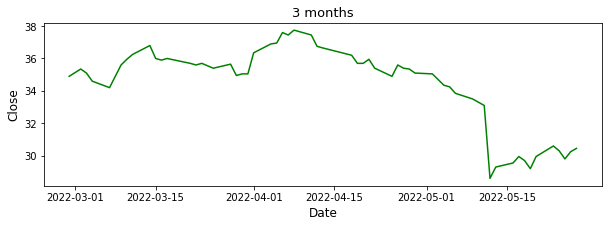

In [ ]:
#  Plotting date vs the close market stock price
plt.figure(figsize=(10,3))
plt.title('5 Years', fontsize=13)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close', fontsize=12)
plt.plot(final_data.Date, final_data.Close,color='red')

# Extract only top 60 rows to make the plot a little clearer
new_data = final_data.tail(60)
plt.figure(figsize=(10,3))
plt.title('3 months', fontsize=13)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close', fontsize=12)
plt.plot(new_data.Date, new_data.Close,color='green')
plt.show()

Creating a new Dataframe and Training data

In [ ]:
# 1. Filter out the closing market price data
close_data = final_data.filter(['Close'])
 
# 2. Convert the data into array for easy evaluation
dataset = close_data.values
 
# 3. Scale/Normalize the data to make all values between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)
 
# 4. Creating training data size : 70% of the data
training_data_len = math.ceil(len(dataset) *.7)
train_data = scaled_data[0:training_data_len  , : ]
 
# 5. Separating the data into x and y data
x_train_data=[]
y_train_data =[]
for i in range(60,len(train_data)):
    x_train_data=list(x_train_data)
    y_train_data=list(y_train_data)
    x_train_data.append(train_data[i-60:i,0])
    y_train_data.append(train_data[i,0])
 
    # 6. Converting the training x and y values to numpy arrays
    x_train_data1, y_train_data1 = np.array(x_train_data), np.array(y_train_data)
 
    # 7. Reshaping training s and y data to make the calculations easier
    x_train_data2 = np.reshape(x_train_data1, (x_train_data1.shape[0],x_train_data1.shape[1],1))

Building LSTM Model

In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train_data2.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

Compiling the Model

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train_data2, y_train_data1, batch_size=1, epochs=1)

806/806 [==============================] - 7s 6ms/step - loss: 0.0031


Testing the model on testing data

In [ ]:
# 1. Creating a dataset for testing
test_data = scaled_data[training_data_len - 60: , : ]
x_test = []
y_test =  dataset[training_data_len : , : ]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])
 
# 2.  Convert the values into arrays for easier computation
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
 
# 3. Making predictions on the testing data
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

Make Predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


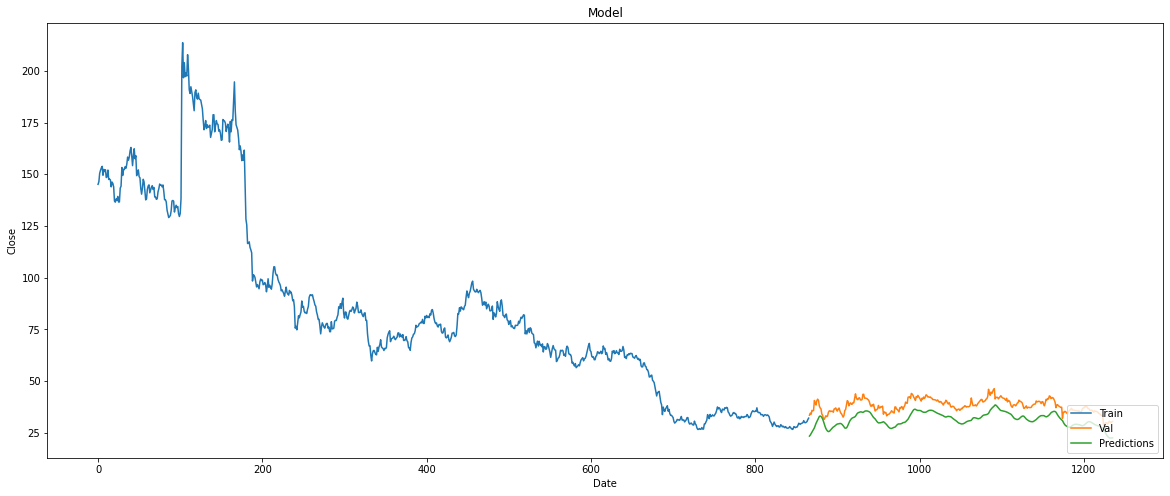

In [ ]:
train = final_data[:training_data_len]
valid = final_data[training_data_len:]
 
valid['Predictions'] = predictions
plt.figure(figsize=(20,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close')
 
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
 
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
 
plt.show()

Actual vs Predicted Values

In [ ]:
table = pd.DataFrame(data=valid, columns=['Close','Predictions'])
table

,Close,Predictions
866,180.350006,163.159409
867,179.750000,165.553482
868,183.600006,167.825500
869,184.850006,170.153397
870,184.149994,172.435257
...,...,...
1231,421.450012,414.142303
1232,425.750000,416.424713
1233,417.000000,419.368347
1234,420.649994,421.670349
